## Epsilon Greedy Selection

In [1]:
import gym
import numpy as np
import random
import pandas as pd
from matplotlib import pyplot as plot
%matplotlib inline

In [2]:
from multi_armed_bandit import MultiArmedBandit

In [3]:
dataset = pd.read_csv("Lawyer_search_engine.csv")

In [4]:
dataset.head()

,Sr. No.,Lawyer Profession,Number of Searches
0,1,Personal Injury,198048
1,2,Estate Planning,203274
2,3,Bankruptcy,253356
3,4,Intellectual Property,285372
4,5,Employment,181151


In [5]:
# Checking column data types
for col in dataset.columns:
    print('Column Name:', col,':', type(dataset[col][0]))

Column Name: Sr. No. : <class 'numpy.int64'>
Column Name: Lawyer Profession : <class 'str'>
Column Name: Number of Searches : <class 'numpy.int64'>


In [6]:
# Calculating Probabilities (Rewards)
x0 = int(dataset['Number of Searches'].iloc[0])
x1 = int(dataset['Number of Searches'].iloc[1])
x2 = int(dataset['Number of Searches'].iloc[2])
x3 = int(dataset['Number of Searches'].iloc[3])
x4 = int(dataset['Number of Searches'].iloc[4])
x5 = int(dataset['Number of Searches'].iloc[5])
x6 = int(dataset['Number of Searches'].iloc[6])
x7 = int(dataset['Number of Searches'].iloc[7])
x8 = int(dataset['Number of Searches'].iloc[8])
x9 = int(dataset['Number of Searches'].iloc[9])
x10 = int(dataset['Number of Searches'].iloc[10])
x11 = int(dataset['Number of Searches'].iloc[11])
x12 = int(dataset['Number of Searches'].iloc[12])
x13 = int(dataset['Number of Searches'].iloc[13])
x14 = int(dataset['Number of Searches'].iloc[14])
x15 = int(dataset['Number of Searches'].iloc[15])
X = x0+x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15

In [7]:
def create_bandit(reward_dist):
    if abs(sum(reward_dist )-1 ) > 0.1e-2:
        print("Adjust the reward distribution to sum to one.")
    env = MultiArmedBandit(reward_probability_dist=probabilities_of_searches)
    number_of_professions_of_lawyers= len(probabilities_of_searches)
    return env,number_of_professions_of_lawyers

In [8]:
tot_episodes=800
tot_steps =400
probabilities_of_searches = [x0/X,x1/X,x2/X,x3/X,x4/X,x5/X,x6/X,x7/X,x8/X,x9/X,x10/X,x11/X,x12/X,x13/X,x14/X,x15/X]
env,tot_number_of_professions_of_lawyers = create_bandit(probabilities_of_searches)
tot_number_of_professions_of_lawyers = len(probabilities_of_searches)
print('The total number of Lawyer type is:', tot_number_of_professions_of_lawyers)


The total number of Lawyer type is: 16


In [9]:
def perform_random_multiarm_bandit():
    

    average_value_function = np.zeros(tot_number_of_professions_of_lawyers)
    cumulated_reward_list = list()


    for episode in range(tot_episodes):
        cumulated_reward = 0
        reward_counter_array = np.zeros(tot_number_of_professions_of_lawyers)
        action_counter_array = np.full(tot_number_of_professions_of_lawyers, 1.0e-5)
        for step in range(tot_steps):
            action = np.random.randint(low=0, high=tot_number_of_professions_of_lawyers)
            reward = env.step(action)
            reward_counter_array[action] += reward
            action_counter_array[action] += 1
            cumulated_reward += reward
        cumulated_reward_list.append(cumulated_reward)
        value_function = np.true_divide(reward_counter_array, action_counter_array)
        average_value_function += value_function
    return average_value_function,cumulated_reward_list,action_counter_array




In [10]:
# Checking Random Rewards
random_average_value_fn ,random_rewards,random_actions = perform_random_multiarm_bandit()
print(np.mean(random_rewards))

25.4175


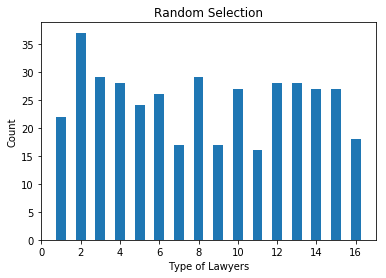

In [11]:
plot.title("Random Selection")
plot.bar(range(1,tot_number_of_professions_of_lawyers+1),random_actions,width =0.5)
plot.xlabel('Type of Lawyers')
plot.ylabel('Count')

In [12]:
def return_greedy_action(reward_counter_array):
    amax = np.amax(reward_counter_array)
    indices = np.where(reward_counter_array == amax)[0]
    action = np.random.choice(indices)
    return action

In [15]:
def perform_greedy_multiarm_bandit():

    average_value_function = np.zeros(tot_number_of_professions_of_lawyers)
    cumulated_reward_list = list()
    epsilon = 0.1

    for episode in range(tot_episodes):
        cumulated_reward = 0
        reward_counter_array = np.zeros(tot_number_of_professions_of_lawyers)
        action_counter_array = np.full(tot_number_of_professions_of_lawyers, 1.0e-5)
        for step in range(tot_steps):
            action = return_greedy_action(reward_counter_array)
            reward = env.step(action)
            reward_counter_array[action] += reward
            action_counter_array[action] += 1
            cumulated_reward += reward
        cumulated_reward_list.append(cumulated_reward)
        value_function = np.true_divide(reward_counter_array, action_counter_array)
        average_value_function += value_function
    return average_value_function,cumulated_reward_list,action_counter_array

In [16]:
greedy_average_value_fn,greedy_rewards,greedy_actions = perform_greedy_multiarm_bandit()

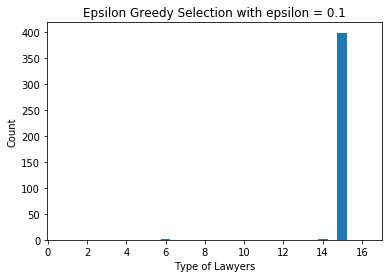

In [17]:
plot.title("Epsilon Greedy Selection with epsilon = 0.1")
plot.bar(range(1,tot_number_of_professions_of_lawyers+1),greedy_actions,width =0.5)
plot.xlabel('Type of Lawyers')
plot.ylabel('Count')

In [18]:
print(np.mean(greedy_rewards))

25.27875


In [19]:
def return_epsilon_greedy_action(epsilon, reward_counter_array):
    
    tot_actions = reward_counter_array.shape[0]
    if random.uniform(0, 1) <= epsilon:
        action = np.random.randint(low=0, high=tot_actions)
    else:
        amax = np.amax(reward_counter_array)
        indices = np.where(reward_counter_array == amax)[0]
        action = np.random.choice(indices)
    return action

In [20]:
def perform_epsilon_greedy_multiarm_bandit(epsilon=0.1):

    average_value_function = np.zeros(tot_number_of_professions_of_lawyers)
    cumulated_reward_list = list()
    

    for episode in range(tot_episodes):
        cumulated_reward = 0
        reward_counter_array = np.zeros(tot_number_of_professions_of_lawyers)
        action_counter_array = np.full(tot_number_of_professions_of_lawyers, 1.0e-5)
        for step in range(tot_steps):

            action = return_epsilon_greedy_action(epsilon, np.true_divide(reward_counter_array, action_counter_array))
            reward = env.step(action)
            reward_counter_array[action] += reward
            action_counter_array[action] += 1
            cumulated_reward += reward
        cumulated_reward_list.append(cumulated_reward)
        value_function = np.true_divide(reward_counter_array, action_counter_array)
        average_value_function += value_function
    return average_value_function,cumulated_reward_list,action_counter_array

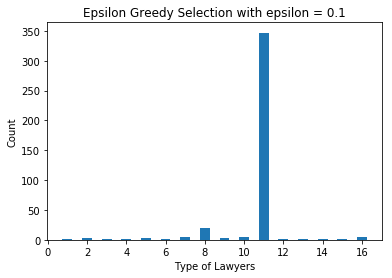

In [21]:
ep_greedy_average_value_fn,ep_greedy_rewards,ep_greedy_actions = perform_epsilon_greedy_multiarm_bandit(epsilon=0.1)
plot.title("Epsilon Greedy Selection with epsilon = 0.1")
plot.bar(range(1,tot_number_of_professions_of_lawyers+1),ep_greedy_actions,width =0.5)
plot.xlabel('Type of Lawyers')
plot.ylabel('Count')

In [22]:
print(np.mean(ep_greedy_rewards))

26.02375


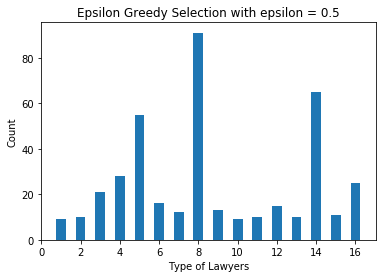

In [23]:
ep_greedy_average_value_fn,ep_greedy_rewards,ep_greedy_actions = perform_epsilon_greedy_multiarm_bandit(epsilon=0.5)
plot.title("Epsilon Greedy Selection with epsilon = 0.5")
plot.bar(range(1,tot_number_of_professions_of_lawyers+1),ep_greedy_actions,width =0.5)
plot.xlabel('Type of Lawyers')
plot.ylabel('Count')

In [24]:
print(np.mean(ep_greedy_rewards))

25.59125


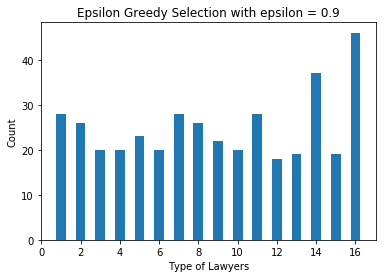

In [25]:
ep_greedy_average_value_fn,ep_greedy_rewards,ep_greedy_actions = perform_epsilon_greedy_multiarm_bandit(epsilon=0.9)
plot.title("Epsilon Greedy Selection with epsilon = 0.9")
plot.bar(range(1,tot_number_of_professions_of_lawyers+1),ep_greedy_actions,width =0.5)
plot.xlabel('Type of Lawyers')
plot.ylabel('Count')

In [26]:
print(np.mean(ep_greedy_rewards))

25.02375


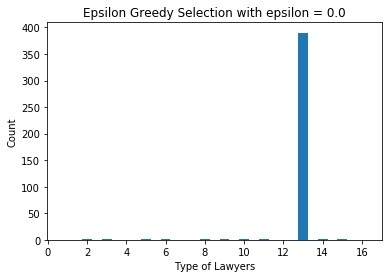

In [27]:
ep_greedy_average_value_fn,ep_greedy_rewards,ep_greedy_actions = perform_epsilon_greedy_multiarm_bandit(epsilon=0.0)
plot.title("Epsilon Greedy Selection with epsilon = 0.0")
plot.bar(range(1,tot_number_of_professions_of_lawyers+1),ep_greedy_actions,width =0.5)
plot.xlabel('Type of Lawyers')
plot.ylabel('Count')

In [28]:
print(np.mean(ep_greedy_rewards))

25.26375
